# Guia Rápido: Como Usar o Google Colab com as Planilhas do Curso

**O Google Colab é um ambiente online gratuito para rodar notebooks Jupyter, sem instalar nada. Basta ter uma conta Google!**

## Passo a passo para começar:

1. **Acesse o repositório do curso no GitHub.**
2. Clique no notebook desejado (ex: `exercicio_pratico_m3.ipynb`).
3. Clique em “Abrir no Colab” ou copie o link do notebook e abra em [colab.research.google.com](https://colab.research.google.com/).

## Como carregar as planilhas no Colab?

**Opção 1: Usar o link direto do GitHub (mais fácil!)**
```python
url = 'https://raw.githubusercontent.com/Miriam1s/mini_curso_inobar/main/vendas_lanchonete_ampliado.csv'
df = pd.read_csv(url)
```

**Opção 2: Fazer upload manual**
- Clique em “Arquivos” (ícone de pasta à esquerda no Colab).
- Clique em “Upload” e selecione o arquivo `.csv`.
- Leia o arquivo normalmente:
```python
df = pd.read_csv('nome_do_arquivo.csv')
```

**Opção 3: Usar o Google Drive**
```python
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/pasta_do_arquivo/nome_do_arquivo.csv')
```

**Dica extra:** Para baixar arquivos automaticamente do GitHub:
```python
!wget https://raw.githubusercontent.com/Miriam1s/mini_curso_inobar/main/vendas_lanchonete_ampliado.csv
```

## Dicas para iniciantes
- Execute as células na ordem (Shift+Enter).
- Se der erro, confira o nome do arquivo e leia a mensagem.
- Use `df.head()` para ver as primeiras linhas da tabela.
- Salve uma cópia do notebook no seu Google Drive antes de editar.


# Módulo 3: Gerando Insights com Análise e Visualização 📊

## Cenário

No Módulo 2, fizemos o trabalho pesado de limpar e organizar nossos dados de vendas. Agora, com um conjunto de dados limpo e confiável, podemos começar a parte mais divertida: **responder perguntas de negócio**.

O gerente da lanchonete quer saber:
1.  Qual produto gera mais receita?
2.  Em qual dia da semana vendemos mais?

Nossa missão é usar o poder do Pandas e das bibliotecas de visualização para transformar nossos dados em respostas claras e visuais.

### Passo 0: Configuração do Ambiente

Além do `pandas`, agora vamos importar duas novas bibliotecas essenciais:
- **`matplotlib.pyplot` (apelido `plt`):** A biblioteca fundamental para criar gráficos em Python. Ela nos dá controle total sobre a aparência das nossas visualizações.
- **`seaborn` (apelido `sns`):** Construída sobre o Matplotlib, ela nos permite criar gráficos estatísticos mais bonitos e complexos com menos código.

Vamos também definir um "tema" para o Seaborn, para que nossos gráficos já comecem com um visual mais profissional.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define o estilo visual dos gráficos
sns.set_theme(style="whitegrid")

### Passo 1: Preparando os Dados (Recapitulando o Módulo 2)

Para garantir que este notebook funcione de forma independente, vamos executar rapidamente todos os passos de limpeza que aprendemos no Módulo 2. Isso garante que estamos partindo de uma base de dados limpa e pronta para a análise.

In [21]:
# 1. Carregar os dados
# Agora usando o arquivo ampliado com dados de 2018 a 2025!
arquivo = 'vendas_lanchonete_ampliado.csv'
df = pd.read_csv(arquivo)

# 2. Limpar e transformar os dados
df['ID_Cliente'] = df['ID_Cliente'].fillna(0)
df['Preco'] = df['Preco'].astype(float)
df['ID_Cliente'] = df['ID_Cliente'].astype(int)
df['Data'] = pd.to_datetime(df['Data'])

# 3. Criar a coluna 'Total_Venda'
df['Total_Venda'] = df['Preco'] * df['Quantidade']

# 4. Verificar o resultado
print("Dados limpos e prontos para análise:")
df.info()
print("\nPrimeiras linhas do DataFrame final:")
display(df.head())
# Dica: Use sempre df.head() para ver rapidamente se os dados ficaram como esperado!


Dados limpos e prontos para análise:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data         56 non-null     datetime64[ns]
 1   Produto      56 non-null     object        
 2   Quantidade   56 non-null     int64         
 3   Preco        56 non-null     float64       
 4   ID_Cliente   56 non-null     int64         
 5   Total_Venda  56 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 2.8+ KB

Primeiras linhas do DataFrame final:


,Data,Produto,Quantidade,Preco,ID_Cliente,Total_Venda
0,2018-01-15,Coxinha,10,5.0,101,50.0
1,2018-02-20,Pastel,8,6.5,102,52.0
2,2018-03-10,Pão de Queijo,15,3.0,103,45.0
3,2018-04-05,Suco Natural,12,4.5,104,54.0
4,2018-05-18,Empada,7,5.5,105,38.5


### Passo 2: O Poder do Agrupamento com `.groupby()`

Para responder nossas perguntas, precisamos agregar nossos dados. Por exemplo, para saber o total de vendas por produto, precisamos somar todas as vendas de "Coxinha", todas as de "Pastel", e assim por diante.

É aqui que entra o método `.groupby()`, uma das ferramentas mais poderosas do Pandas.

> **Analogia:** Pense no `.groupby()` como separar uma pilha de roupas para lavar. Você tem uma pilha de roupas misturadas (seu DataFrame). `df.groupby('Produto')` é o ato de criar montes separados: um para coxinhas, um para pastéis, etc. Depois de separar, você pode aplicar uma operação a cada monte, como somar (`.sum()`), contar (`.count()`) ou calcular a média (`.mean()`).

#### Pergunta 1: Qual produto gera mais receita?

**Lógica:**
1.  **Agrupar** os dados por `Produto`.
2.  Selecionar a coluna que queremos agregar: `Total_Venda`.
3.  Aplicar a operação de **soma** (`.sum()`).
4.  Ordenar os resultados para ver os melhores primeiro (`.sort_values()`).

In [22]:
faturamento_por_produto = df.groupby('Produto')['Total_Venda'].sum().sort_values(ascending=False)

print("Faturamento total por produto:")
print(faturamento_por_produto)

Faturamento total por produto:
Produto
Coxinha            883.5
Café               837.2
Pastel             781.7
Pão de Queijo      653.1
Bolo de Cenoura    639.0
Suco Natural       607.9
Empada             573.6
Name: Total_Venda, dtype: float64


#### Visualizando a Resposta

Uma tabela de números é boa, mas um gráfico é muito mais eficaz para comunicar esse resultado em uma apresentação.

Como estamos comparando categorias (produtos), um **gráfico de barras** é a escolha ideal.

C:\Users\miria\AppData\Local\Temp\ipykernel_7744\2309245859.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=faturamento_por_produto.index, y=faturamento_por_produto.values, palette='viridis')


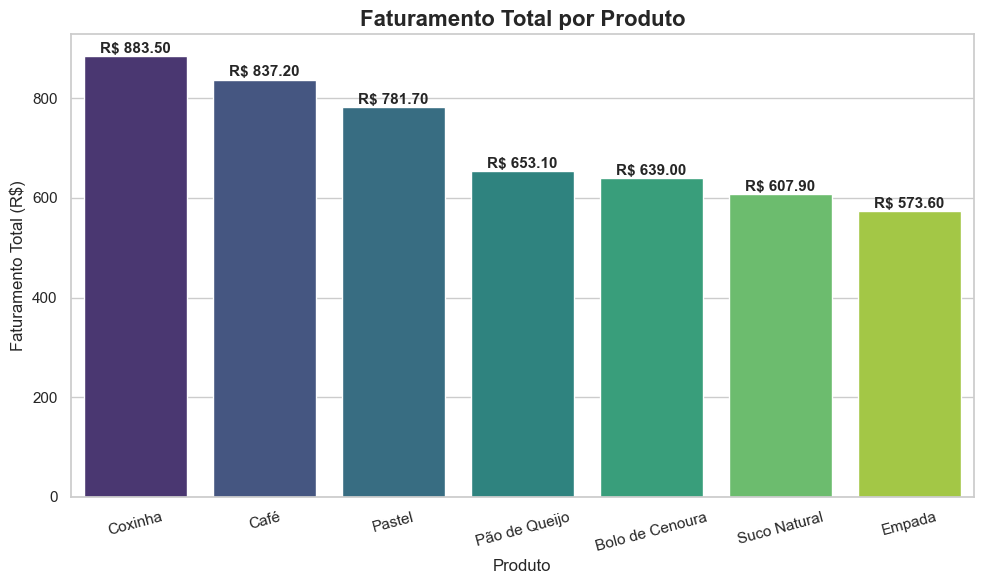

In [23]:
# Gráfico de barras aprimorado: Faturamento por Produto
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=faturamento_por_produto.index, y=faturamento_por_produto.values, palette='viridis')

# Adiciona os valores em cima de cada barra
for i, v in enumerate(faturamento_por_produto.values):
    ax.text(i, v + 0.5, f'R$ {v:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Faturamento Total por Produto', fontsize=16, fontweight='bold')
plt.xlabel('Produto', fontsize=12)
plt.ylabel('Faturamento Total (R$)', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Dica: Gráficos claros e com valores ajudam a tomada de decisão rápida por gestores e contadores!


> 💡 **Dica de Storytelling com Dados:**
> * **Sempre dê um título claro ao seu gráfico.** A audiência deve entender o que está vendo sem precisar de explicações.
> * **Rotule seus eixos.** O que significa o eixo X? E o Y? Inclua a unidade de medida (R$, %, etc.).
> * **Ordene suas barras.** Barras ordenadas (do maior para o menor, por exemplo) são muito mais fáceis de ler do que barras desordenadas.

**Insight:** A Coxinha é claramente nosso carro-chefe em faturamento!

#### Pergunta 2: Em qual dia da semana vendemos mais?

**Lógica:**
1.  Primeiro, precisamos criar uma coluna com o dia da semana. O Pandas torna isso fácil com o acessor `.dt` em colunas de data.
2.  Depois, agrupamos por essa nova coluna (`Dia_Semana`) e somamos o `Total_Venda`.
3.  **Pulo do Gato:** Os dias da semana virão em ordem alfabética. Precisamos reordená-los para a ordem correta (Segunda, Terça, etc.) para que o gráfico faça sentido.

In [24]:
# 1. Criar a coluna com o nome do dia da semana
# Usamos .dt.day_name() para obter o nome do dia em inglês
df['Dia_Semana'] = df['Data'].dt.day_name()

# 2. Agrupar e somar
vendas_por_dia = df.groupby('Dia_Semana')['Total_Venda'].sum()

# 3. Corrigir a ordem dos dias
dias_ordem = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
vendas_por_dia = vendas_por_dia.reindex(dias_ordem).dropna()

print("Faturamento por dia da semana:")
print(vendas_por_dia)

Faturamento por dia da semana:
Dia_Semana
Monday        731.5
Tuesday      1105.8
Wednesday     347.7
Thursday      443.2
Friday        940.9
Saturday      733.5
Sunday        673.4
Name: Total_Venda, dtype: float64


#### Visualizando a Resposta

Novamente, um gráfico de barras é perfeito para comparar o desempenho de cada dia.

C:\Users\miria\AppData\Local\Temp\ipykernel_7744\1230538216.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=vendas_por_dia.index, y=vendas_por_dia.values, palette='plasma')


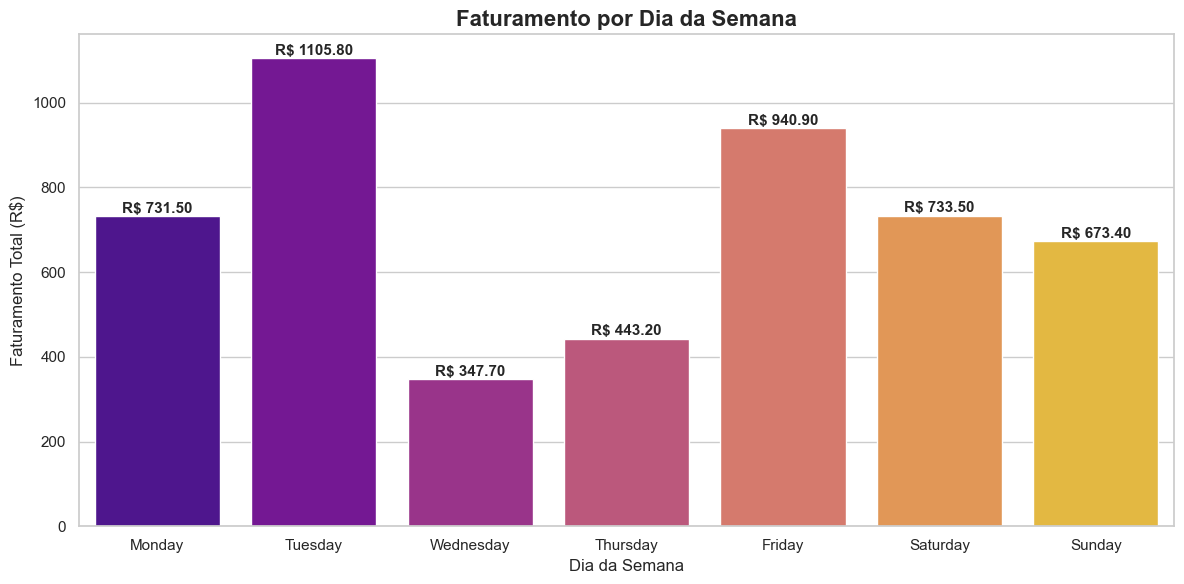

In [25]:
# Gráfico de barras aprimorado: Faturamento por Dia da Semana
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=vendas_por_dia.index, y=vendas_por_dia.values, palette='plasma')

# Adiciona os valores em cima de cada barra
for i, v in enumerate(vendas_por_dia.values):
    ax.text(i, v + 0.5, f'R$ {v:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Faturamento por Dia da Semana', fontsize=16, fontweight='bold')
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Faturamento Total (R$)', fontsize=12)
plt.tight_layout()
plt.show()

# Observação: Identificar o melhor dia de vendas pode ajudar a planejar promoções e escala de funcionários!


**Insight:** Nossas vendas se concentram no início da semana, com um pico na Terça-feira. Isso pode indicar uma oportunidade para promoções no final de semana para atrair mais clientes.

### Desafio Final! 🏆

Agora é sua vez de ser o analista!

**Sua missão:** O gerente quer saber qual produto vende mais em **quantidade**, não em faturamento. 

1.  Calcule a **quantidade total de itens vendidos por produto**.
2.  Crie um gráfico de barras para visualizar o resultado. Não se esqueça de dar um bom título e rotular os eixos!

In [26]:
# Escreva seu código aqui!
# Dica: A lógica é muito parecida com a da Pergunta 1, mas você vai somar a coluna 'Quantidade'.
# 1. Agrupe por 'Produto' e some a coluna 'Quantidade'.
# 2. Crie um gráfico de barras para visualizar o resultado.
# 3. Não esqueça de dar um título e rotular os eixos do gráfico!
# Se precisar de ajuda, volte e veja como foi feito para o faturamento por produto.


#### Solução do Desafio

C:\Users\miria\AppData\Local\Temp\ipykernel_7744\2955194716.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=quantidade_por_produto.index, y=quantidade_por_produto.values, palette='cividis')


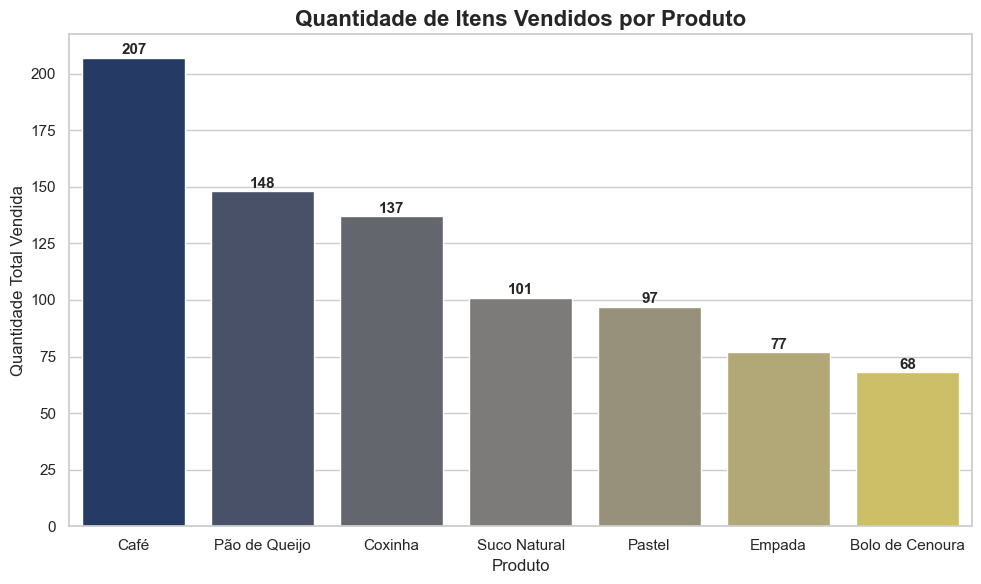

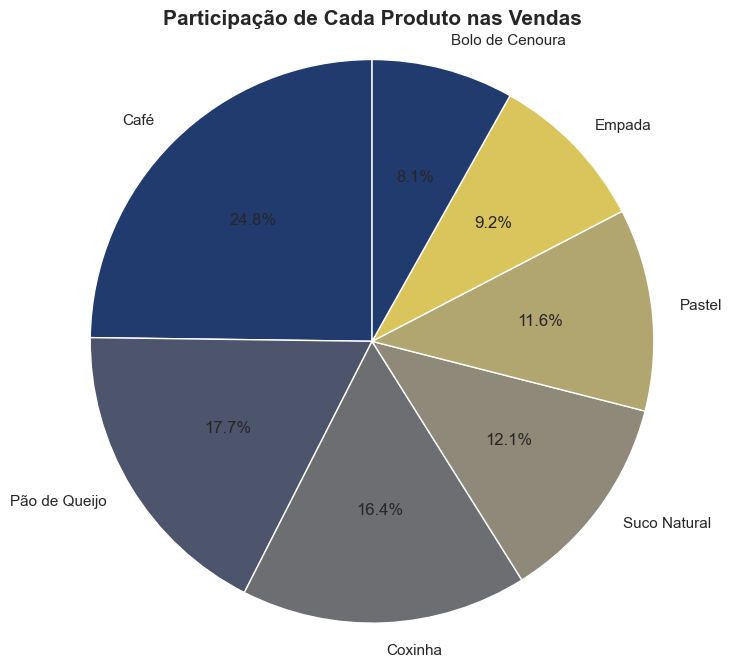

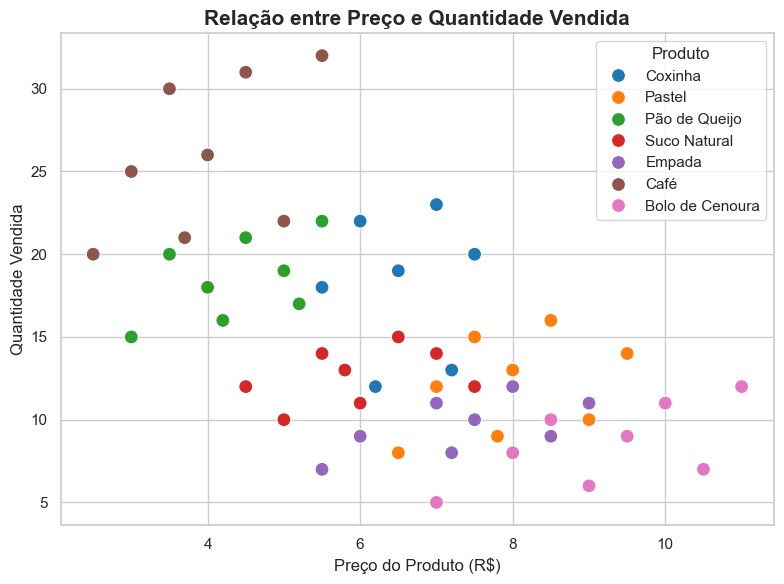

In [27]:
# 1. Agrupar por 'Produto' e somar a 'Quantidade'
quantidade_por_produto = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

# 2. Gráfico de barras aprimorado
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=quantidade_por_produto.index, y=quantidade_por_produto.values, palette='cividis')
for i, v in enumerate(quantidade_por_produto.values):
    ax.text(i, v + 0.2, f'{v}', ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.title('Quantidade de Itens Vendidos por Produto', fontsize=16, fontweight='bold')
plt.xlabel('Produto', fontsize=12)
plt.ylabel('Quantidade Total Vendida', fontsize=12)
plt.tight_layout()
plt.show()

# 3. Gráfico de pizza: participação de cada produto nas vendas
plt.figure(figsize=(8, 8))
plt.pie(quantidade_por_produto, labels=quantidade_por_produto.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('cividis'))
plt.title('Participação de Cada Produto nas Vendas', fontsize=15, fontweight='bold')
plt.axis('equal')
plt.show()

# 4. Relação entre preço e quantidade vendida (gráfico de dispersão)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Preco', y='Quantidade', data=df, hue='Produto', s=100, palette='tab10')
plt.title('Relação entre Preço e Quantidade Vendida', fontsize=15, fontweight='bold')
plt.xlabel('Preço do Produto (R$)')
plt.ylabel('Quantidade Vendida')
plt.legend(title='Produto')
plt.tight_layout()
plt.show()

# Dica: Gráficos de dispersão ajudam a identificar se produtos mais baratos vendem mais, útil para decisões de precificação!


## Conclusão do Minicurso

**Parabéns!** 🎉

Você completou a jornada completa de um analista de dados:
1.  Recebeu dados brutos e bagunçados (`.csv`).
2.  Explorou, limpou e preparou os dados para análise (Módulo 2).
3.  Transformou os dados limpos em respostas para perguntas de negócio usando agregações (`.groupby()`).
4.  Comunicou suas descobertas de forma clara e visual com gráficos (`matplotlib` e `seaborn`).

Este é o ciclo fundamental da análise de dados. As ferramentas e técnicas que você aprendeu aqui são a base para resolver problemas muito mais complexos no mundo real.

Lembre-se que este é apenas o começo. Continue praticando, seja curioso e explore a seção **"Como Continuar sua Jornada em Dados"** no `README.md` do nosso repositório para encontrar livros, plataformas e dicas para construir seu portfólio.

**Obrigado por participar e boa sorte na sua jornada de dados!**

## 📈 Análise de Correlação e Dicas para Negócios

Vamos além: será que existe relação entre o preço do produto e o faturamento total? E entre quantidade vendida e faturamento?

### Exemplo de análise de correlação

```python
# Correlação entre preço e faturamento total
correlacao = df[['Preco', 'Total_Venda']].corr()
print('Correlação entre Preço e Faturamento Total:')
print(correlacao)
```

> **Interpretação:**
> - Correlação próxima de 1: relação forte e positiva (quando um aumenta, o outro também).
> - Correlação próxima de 0: pouca ou nenhuma relação.
> - Correlação próxima de -1: relação forte e negativa (quando um aumenta, o outro diminui).

### Dicas para Administradores e Contadores
- Use gráficos para apresentar resultados em reuniões: eles facilitam a compreensão rápida.
- Analise dias de maior movimento para planejar promoções e escala de funcionários.
- Compare produtos líderes em quantidade e faturamento para ajustar preços e mix de produtos.
- Use a análise de correlação para identificar oportunidades de aumentar vendas sem necessariamente baixar preços.

---

**Experimente criar outros gráficos!**
- Gráfico de linha para evolução das vendas ao longo do tempo.
- Gráfico de dispersão para comparar clientes ou produtos.
- Gráfico de barras empilhadas para comparar categorias.

Essas análises são muito valorizadas em empresas e escritórios de contabilidade!


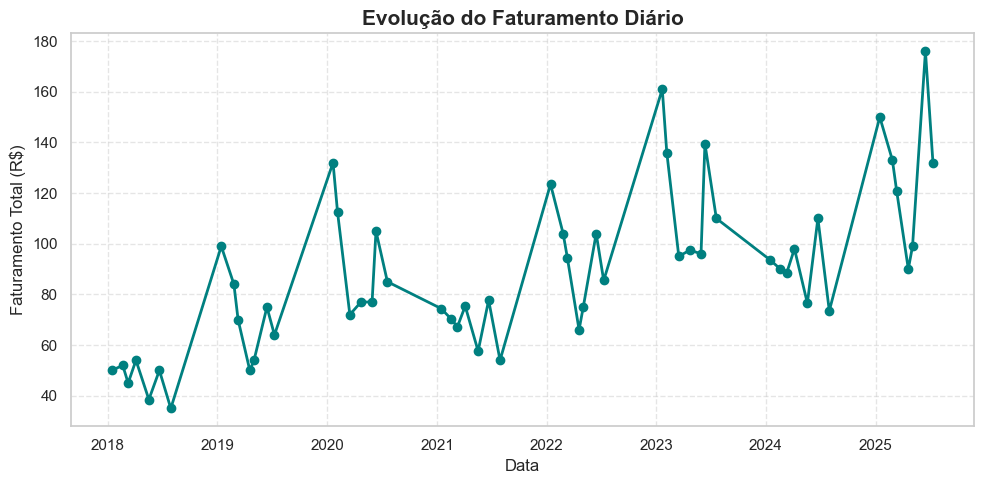

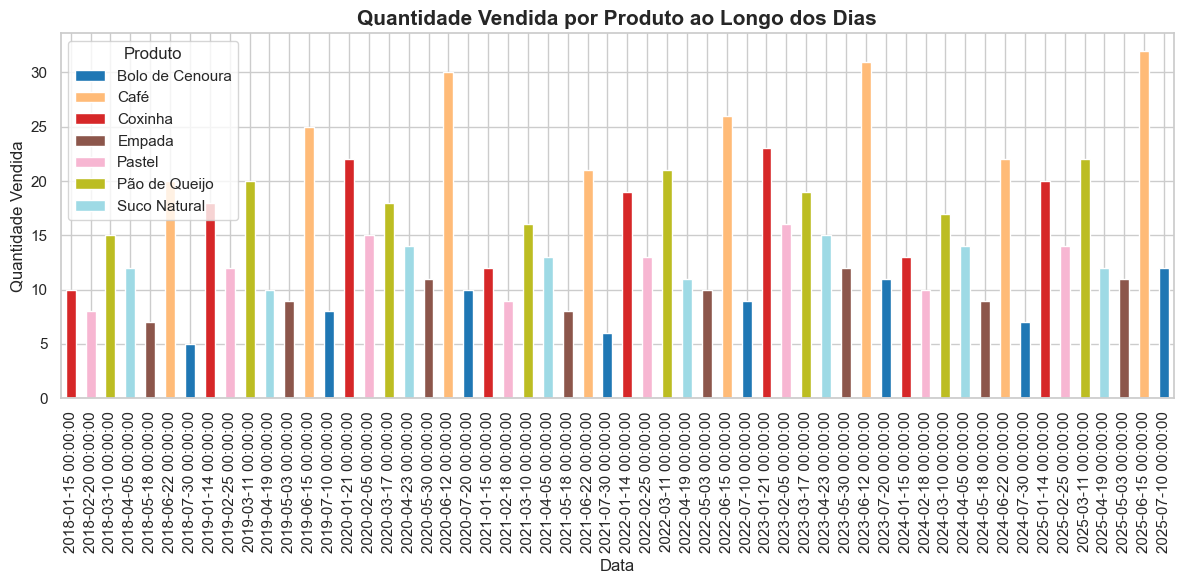

In [28]:
# Exemplo: Gráfico de linha - Evolução do faturamento ao longo do tempo
plt.figure(figsize=(10, 5))
df_diario = df.groupby('Data')['Total_Venda'].sum()
plt.plot(df_diario.index, df_diario.values, marker='o', color='teal', linewidth=2)
plt.title('Evolução do Faturamento Diário', fontsize=15, fontweight='bold')
plt.xlabel('Data')
plt.ylabel('Faturamento Total (R$)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Exemplo: Gráfico de barras empilhadas - Quantidade vendida por produto ao longo dos dias
pivot = df.pivot_table(index='Data', columns='Produto', values='Quantidade', aggfunc='sum', fill_value=0)
pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Quantidade Vendida por Produto ao Longo dos Dias', fontsize=15, fontweight='bold')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.legend(title='Produto')
plt.tight_layout()
plt.show()

# Dica: Gráficos de linha mostram tendências ao longo do tempo, enquanto barras empilhadas ajudam a comparar categorias em diferentes datas!


---

## 📊 Sobre o novo conjunto de dados ampliado

Agora estamos trabalhando com um arquivo de vendas fictício que cobre o período de 2018 a 2025, com muitos produtos, clientes e valores variados. Isso permite:
- Analisar tendências de vendas ao longo dos anos
- Comparar desempenho de produtos em diferentes épocas
- Explorar sazonalidade, crescimento e mudanças de preço
- Praticar análises mais realistas e próximas do mundo dos negócios

Aproveite para criar perguntas e análises novas a partir desse conjunto de dados!


## 📊 Gráficos fáceis e rápidos com pandas

Você pode criar gráficos bonitos e informativos com apenas uma linha de código usando o pandas! Veja exemplos práticos para usar em qualquer célula do notebook:

### Gráfico de barras: Faturamento por Produto
```python
# Faturamento total por produto
(df.groupby('Produto')['Total_Venda'].sum()
   .plot(kind='bar', color='skyblue', figsize=(8,5), title='Faturamento por Produto'))
plt.ylabel('Faturamento (R$)')
plt.xlabel('Produto')
plt.show()
```

### Gráfico de pizza: Participação de cada produto
```python
(df.groupby('Produto')['Total_Venda'].sum()
   .plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Participação no Faturamento'))
plt.ylabel('')
plt.show()
```

### Gráfico de linha: Evolução do faturamento anual
```python
df['Ano'] = df['Data'].dt.year
(df.groupby('Ano')['Total_Venda'].sum()
   .plot(kind='line', marker='o', color='green', title='Faturamento Anual'))
plt.ylabel('Faturamento (R$)')
plt.xlabel('Ano')
plt.show()
```

> **Dica:** Você pode trocar o `kind` para 'bar', 'pie', 'line', 'area', etc. e experimentar diferentes visualizações!


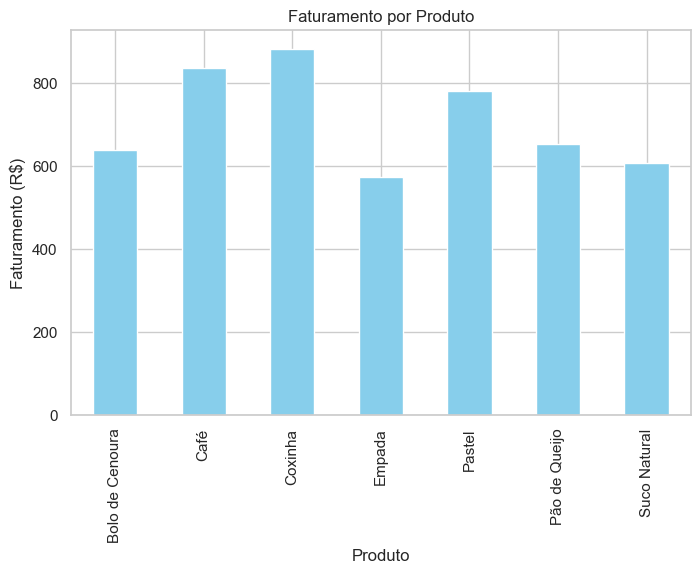

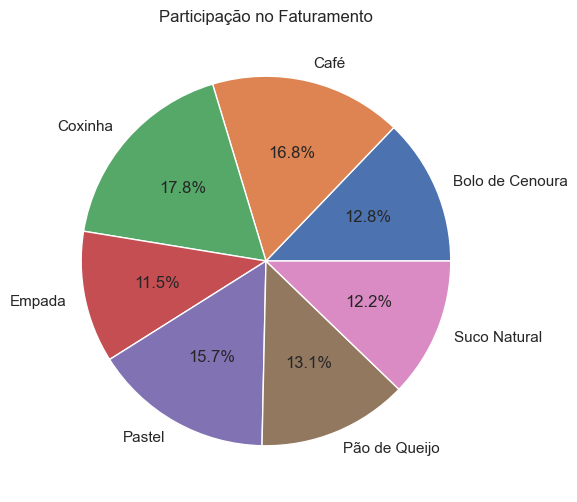

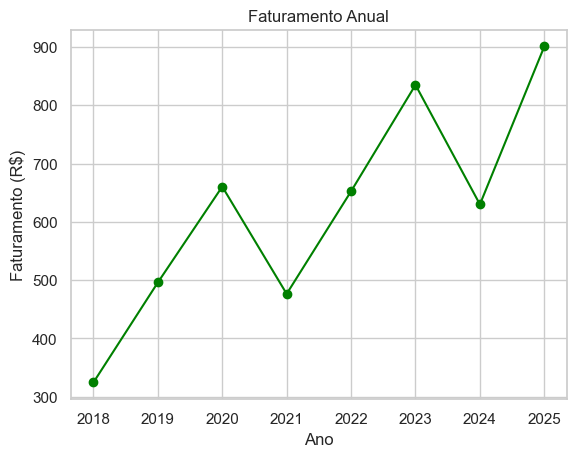

In [29]:
# Gráfico de barras: Faturamento por Produto
(df.groupby('Produto')['Total_Venda'].sum()
   .plot(kind='bar', color='skyblue', figsize=(8,5), title='Faturamento por Produto'))
plt.ylabel('Faturamento (R$)')
plt.xlabel('Produto')
plt.show()

# Gráfico de pizza: Participação de cada produto
(df.groupby('Produto')['Total_Venda'].sum()
   .plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Participação no Faturamento'))
plt.ylabel('')
plt.show()

# Gráfico de linha: Evolução do faturamento anual
df['Ano'] = df['Data'].dt.year
(df.groupby('Ano')['Total_Venda'].sum()
   .plot(kind='line', marker='o', color='green', title='Faturamento Anual'))
plt.ylabel('Faturamento (R$)')
plt.xlabel('Ano')
plt.show()
